<a href="https://colab.research.google.com/github/MohammadSarim/Capstone-Project-Play-Store-App-Review-Analysis/blob/main/Capstone_Project_EDA_(PlayStore_App_Review_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**- **Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Mohmmad Sarim
##### **Team Member 2 -** Arushi Saxena
##### **Team Member 3 -** Ilham Pasha
##### **Team Member 4 -** Mohd Imran
##### **Team Member 5 -** Moh Akbar

# **Project Summary -** 


**The purpose of our project** is to conduct an exploratory data analysis on the app reviews data from the Google Play Store. The project aims to Analyze the state of the Android app market and to uncover patterns, trends, and relationships in the data and identify factors that influence the popularity and success of the apps.

### **The following steps will be performed in the project:**

**Data collection**: Collect and gather all relevant data for analysis.

**Data cleaning**: Handle missing values, remove duplicates and handle outliers.

**Univariate Analysis**: Analyze each variable individually to understand its distribution, range, central tendency, and outliers.

**Bivariate Analysis**: Analyze the relationship between two variables and identify the relationship between them.

**Multivariate Analysis**: Analyze more than two variables together to identify complex relationships between variables.

**Data Visualization**: Use various visualizations such as histograms, box plots, scatter plots, etc. to represent the data and gain insights.

**Feature Engineering**: Transform and create new variables to improve the quality of the data.

**Report Writing**: Summarize the insights and findings from the analysis and communicate it effectively to the stakeholders.

# **GitHub Link -**

[GitHub Link](https://github.com/MohammadSarim/Capstone-Project-1-Play-Store-App-Review-Analysis.git)

#**Problem Statement**

1. What are the top five earning Category?
2. Top 5 earnings Apps
3. Total number of paid and free apps on playstore and it's ratio?
4. Total Number of user using free and paid Apps
5. Highest rating of apps in each genres.
6. Highest Installations according to month.
7. Top categories on playstore on the basis of number of apps.
8. Which category of Apps from the Content Rating column are found more on playstore ?
9. Top 5 best average rating category on playstore
10. Size distribution of apps in playstore
11. Review counts over the time.
12. Sentiment Percentage Analysis?
13. Apps with the highest number of positive reviews.
14. Apps with the highest number of negative reviews.
15. Analysing the user subjectivity.
16. Relationship between the sentiment_subjectivity and the sentiment_polarity.

#### **Define Your Business Objective?**

The business objective of performing an exploratory data analysis on the app reviews data from the Google Play Store could be:

**Understanding the app market:** By analyzing the app review data, insights can be gained into the app market, including the popularity of different types of apps, the trends and patterns in the data, and the factors that influence the success of an app.

**Improving app development:** The insights from the EDA can help app developers make informed decisions about the development and marketing of their apps. For example, they can understand the features that users value the most and the common complaints and criticisms of their competitors' apps.

**Enhancing app marketing:** The results of the EDA can also be used to inform and guide app marketing strategies. For example, the insights can be used to target the right audience and improve the app's visibility on the Google Play Store.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
]

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")
import missingno as msno

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the csv file of Play Store DataSet
file_path = '/content/drive/My Drive/dataset/Play Store Data.csv'
Play_Store_DataFrame = pd.read_csv(file_path)

In [4]:
# Importing the csv file of User Reviews DataSet
file_path = '/content/drive/My Drive/dataset/User Reviews.csv'
User_Review_DataFrame = pd.read_csv(file_path)

### Dataset First View

In [5]:
#Starting rows of play store dataframe.
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#Starting rows of User Reviews dataframe.
User_Review_DataFrame.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [7]:
#Number of Rows & Columns of Play Store DataFrame
Play_Store_DataFrame.shape

(10841, 13)

In [8]:
# Number Rows & Columns of User Reviews DataFrame
User_Review_DataFrame.shape

(64295, 5)

### Dataset Information

In [9]:
#Checking the details of play store dataframe.
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#Checking the details of User Reviews dataframe.
User_Review_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [11]:
# Duplicate Value Count of Play Store DataFrame
len(Play_Store_DataFrame[Play_Store_DataFrame.duplicated()])

483

In [12]:
# Duplicate Value Count of User Reviews DataFrame
len(User_Review_DataFrame[User_Review_DataFrame.duplicated()])

33616

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count in Play Store DataFrame
print(Play_Store_DataFrame.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [14]:
# Missing Values/Null Values Count in User Review DataFrame
print(User_Review_DataFrame.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


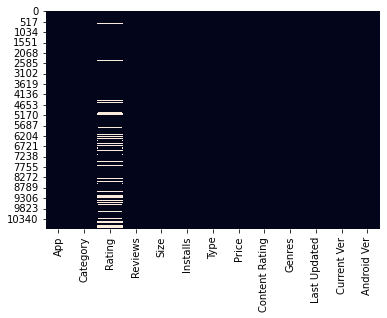

In [15]:
# Visualizing the missing values in Play Store DataFrame
# Checking Null Value by plotting Heatmap
sns.heatmap(Play_Store_DataFrame.isnull(), cbar=False)

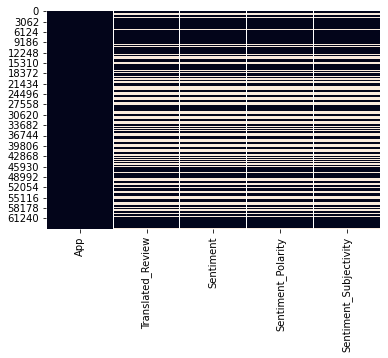

In [16]:
# Visualizing the missing values in User Review DataFrame
# Checking Null Value by plotting Heatmap
sns.heatmap(User_Review_DataFrame.isnull(), cbar=False)

### What did you know about your dataset?

The Google Play Store dataset contains information about the various Android apps that are available for download on the platform.This information typically includes two files as 'Play Store Data.csv' and the other is 'User Reviews.csv'.

* **user_reviews.csv:** The User Reviews dataset has 64295 rows and 5 columns. There are 107457 mising values and 33616 duplicate values in the dataset.

* **playstore data.csv:** The User Reviews dataset has 10841 rows and 13 columns. There are 1487 mising values and 483 duplicate values in the dataset.

## **2. Understanding Your Variables**

In [17]:
# Dataset Columns of Play Store DataFrame
Play_Store_DataFrame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
# Dataset Columns of User Reviews DataFrame
User_Review_DataFrame.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [19]:
# Dataset Describe of Play Store DataFrame
Play_Store_DataFrame.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Dataset Describe of User Review DataFrame
User_Review_DataFrame.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


### Variables Description 

**Let us first define what information the columns contain based on our inspection.**

**play_store dataframe** has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

**User Reviews DataFrame** has 64295 rows and 5 columns. The 5 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Translated_Review** - It contains the Review on the app.
3. **Sentiment:** The overall emotional tone or attitude expressed in a review, such as positive, negative, or neutral.
4. **Sentiment polarity:** A numerical score that quantifies the sentiment of a review, where positive scores indicate positive sentiment, negative scores indicate negative sentiment, and neutral scores indicate neutral sentiment. This score can range from -1 (most negative) to 1 (most positive).
5. **Sentiment subjectivity:** A numerical score that indicates the degree to which a review expresses a personal opinion, as opposed to a factual statement. A score of 0 indicates a completely objective statement, while a score of 1 indicates a completely subjective statement.

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable in Play Store DataFrame.
def playstore_details():
  playstore_content = pd.DataFrame(index=Play_Store_DataFrame.columns)
  playstore_content['Data Type'] = Play_Store_DataFrame.dtypes
  playstore_content['Not Null Values']=Play_Store_DataFrame.count()
  playstore_content['Number of Null Values'] = Play_Store_DataFrame.isnull().sum()
  playstore_content["% of the null value"]=playstore_content.isnull().mean().round(4)*100
  playstore_content['Unique Values'] = Play_Store_DataFrame.nunique()
  return playstore_content 


In [22]:
playstore_details()

,Data Type,Not Null Values,Number of Null Values,% of the null value,Unique Values
App,object,10841,0,NaN,9660
Category,object,10841,0,NaN,34
Rating,float64,9367,1474,NaN,40
Reviews,object,10841,0,NaN,6002
Size,object,10841,0,NaN,462
Installs,object,10841,0,NaN,22
Type,object,10840,1,NaN,3
Price,object,10841,0,NaN,93
Content Rating,object,10840,1,NaN,6
Genres,object,10841,0,NaN,120


Rating has 1474 null values which contributes 13.60% of the data.
Type has 1 null value which contributes 0.01% of the data.
Content_Rating has 1 null value which contributes 0.01% of the data.
Current_Ver has 8 null values which contributes 0.07% of the data.
Android_Ver has 3 null values which contributes 0.03% of the data.

In [23]:
# Check Unique Values for each variable in User Review DataFrame.
def User_Review_info():
  temp_df=pd.DataFrame(index=User_Review_DataFrame.columns)
  temp_df["datatype"]=User_Review_DataFrame.dtypes
  temp_df["not null values"]=User_Review_DataFrame.count()
  temp_df["null value"]=User_Review_DataFrame.isnull().sum()
  temp_df["% of the null value"]=User_Review_DataFrame.isnull().mean().round(4)*100
  temp_df["unique count"]=User_Review_DataFrame.nunique()
  return temp_df

In [24]:
User_Review_info()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


The number of null values are:
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

## 3. **Data Wrangling**

### Data Wrangling Code

Handling **NaN** for the **"Type"** column in **Play Store DataFrame.**

In [25]:
# Applying filter to get the null values in "Type" column
Play_Store_DataFrame[Play_Store_DataFrame.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since there is only one missing value in this column, So, let's fill the missing value. After cross-checking the above row the missing value is found to be Free since the price in the above row is 0, so now we can fill the missing value with Free.



In [26]:
# Substituting "Free" in "Type" column at index 9148.
Play_Store_DataFrame.loc[9148,'Type']='Free'

After filling the value we can check and see if that has been correctly placed.

In [27]:
# Checking the dataframe to confirm the substitution.
Play_Store_DataFrame.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling **NaN** for **"Content Rating"** column in **Play Store DataFrame.**

In [28]:
# Applying filter to get the null values in "Content Rating" column
Play_Store_DataFrame[Play_Store_DataFrame['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Let us have a look at all of its near rows data.

In [29]:
# Checking the nearby rows of row 10472
Play_Store_DataFrame.loc[10465:10480,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can clearly see that row 10472 has missing data for the category column. So, a better idea will be to drop this row.

In [30]:
# Dropping the row by using the index 10472
Play_Store_DataFrame.drop(10472,inplace = True)

In [31]:
# Checking whether the row has been dropped or not.
Play_Store_DataFrame.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Handling **NaN** for the column **"Rating"** in **Play Store DataFrame.**

In [32]:
# Checking the outliers in the Play Store DataFrame.
Play_Store_DataFrame[(Play_Store_DataFrame['Rating'] <1) | (Play_Store_DataFrame['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
# Finding the Median of rating by excluding the null values from the data frame.
Median_Rating = Play_Store_DataFrame[~Play_Store_DataFrame['Rating'].isnull()]['Rating'].median()

In [34]:
# Replacing the null ratings by the median.
Play_Store_DataFrame['Rating'].fillna(value=Median_Rating,inplace=True)
Play_Store_DataFrame.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Handling **NaN** in **"Android ver"** in **Play Store DataFrame.**

In [35]:
# Filtering the null values in the "Android Ver."
Play_Store_DataFrame[Play_Store_DataFrame["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [36]:
# Checking the count of each Andoird ver.
Play_Store_DataFrame["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since, there are only two rows having NaN values in 'Android ver', we can drop the columns from the dataset.

In [37]:
# Dropping the rows having the null values.
Play_Store_DataFrame=Play_Store_DataFrame[Play_Store_DataFrame['Android Ver'].notna()]
Play_Store_DataFrame.shape

(10838, 13)

Handling **NaN** for **"Current ver"** Play Store DataFrame.

In [38]:
# Filtering the null values in "Current Ver" column.
Play_Store_DataFrame[Play_Store_DataFrame["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [39]:
# Checking the count of "Current Ver".
Play_Store_DataFrame["Current Ver"].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since, there are only eight rows having NaN values in 'Current ver', we can drop the columns from the dataset.

In [40]:
# Removing the rows having null values in "Current Ver".
Play_Store_DataFrame=Play_Store_DataFrame[Play_Store_DataFrame['Current Ver'].notna()]
Play_Store_DataFrame.shape

(10830, 13)

Handling **Duplicate values** in the **Play Store DataFrame.**

In [41]:
# Checking the count of app to find the duplicate values in the dataframe.
Play_Store_DataFrame['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [42]:
# Removing the duplicate rows from the data frame.
Play_Store_DataFrame.drop_duplicates(subset = 'App', inplace = True)
Play_Store_DataFrame.shape

(9649, 13)

In [43]:
# Checking whether the duplicate values has bee removed or not.
Play_Store_DataFrame['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

Handling the **missing values** in **Users Reviews DataFrame**.

In [44]:
# Deleting the rows containing NaN values in the user reviews dataframe.
User_Review_DataFrame = User_Review_DataFrame.dropna()

In [45]:
# Checking the shape of dataframe after dropping the null values.
User_Review_DataFrame.shape

(37427, 5)

Correcting Data Types in **Play Store DataFrame**.

In [46]:
# Checking the datatype of each column in the play store dataframe.
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Converting the data type of **Reviews** columns from **object to numeric** in **Play Store DataFrame**.

In [47]:
# Converting the datatype of "Reviews" to int type.
Play_Store_DataFrame['Reviews'] = Play_Store_DataFrame['Reviews'].astype(int)

In [48]:
# Checking the data type of "Review".
Play_Store_DataFrame['Reviews'].dtype

dtype('int64')

In [49]:
# Function to convert the values of size into float type.
def data_converter(val):
  try:
    if val == 'Varies with device':
      return np.nan
    elif 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [50]:
# Calling the function data_converter to convert the datatype of size into float and assign the new values to the similar column "Size".
Play_Store_DataFrame['Size'] = Play_Store_DataFrame['Size'].apply(lambda x: data_converter(x))
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [51]:
# Checking the count of "Size" column.
Play_Store_DataFrame['Size'].value_counts()

12.0000    181
11.0000    181
13.0000    177
14.0000    176
15.0000    163
          ... 
0.7041       1
0.4199       1
0.4189       1
0.1953       1
0.6045       1
Name: Size, Length: 455, dtype: int64

In [52]:
# Checking the null values in "Size" column.
Play_Store_DataFrame['Size'].isnull().sum()

1227

Since we converted the "Varies with device" value to NaN , so we have to do something with those set of NaN values data. It will be a better idea to drop the Rows of the column Size having NaN values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [53]:
# Dropping the rows having null values in "Size" Column.
Play_Store_DataFrame.dropna(subset = ['Size'], inplace=True)

In [54]:
# Checking whether the null values has been dropped or not.
Play_Store_DataFrame['Size'].isnull().sum()

0

Converting **"Installs"** column data type form **string into float type** in **Play Store DtaFrame**.

In [55]:
# Creating a function to remove + and , from the Installs column and convert the datatype into int type.
def RemoveSignsfromInstall(str1):
  if '+' and ',' in str1:
    numeric_value = (int(str1[:-1].replace(',','')))
    return numeric_value
  elif "+" in str1:
    numeric_value1 = (int(str1[:-1]))
    return numeric_value1
  else:
    return int(str1)  

In [56]:
# Calling the function RemoveSignsfromInstall and assigning the values to same column "Installs".
Play_Store_DataFrame['Installs'] = Play_Store_DataFrame['Installs'].apply(lambda x: RemoveSignsfromInstall(x))

In [57]:
#Checking the few rows of column "Installs" to confirm the conversion.
Play_Store_DataFrame['Installs'].head(5)

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

Converting the **"Price"** column datatype from **string into numeric** in **Play Store DataFrame**.

In [58]:
#Checking the count of "Price".
Play_Store_DataFrame['Price'].value_counts()

0          7740
$0.99       140
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [59]:
# Creating the function to remove the $ sign in "Price" column.
def PriceConverter(str1):
  if "$" in str1:
    return float(str1[1:])
  else:
    return float(str1)  

In [60]:
# Calling the function PriceConverter and assigning the converted values to the same column "Price".
Play_Store_DataFrame['Price'] = Play_Store_DataFrame['Price'].apply(lambda x: PriceConverter(x))

In [61]:
# Checking the 5 rows of column "Price" to confirm the conversion.
Play_Store_DataFrame[Play_Store_DataFrame['Type']=="Paid"].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6.2000,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,4.3,0,20.0000,50,Paid,1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,0.0176,100,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up


In [62]:
# Checking the count of "Price" column.
Play_Store_DataFrame['Price'].value_counts()

0.00      7740
0.99       140
2.99       110
1.99        66
4.99        63
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 87, dtype: int64

Converting the **"Last Updated"** column from **object to date format** in **Play Store DataFrame**.

In [63]:
Play_Store_DataFrame["Last Updated"] = pd.to_datetime(Play_Store_DataFrame['Last Updated'], infer_datetime_format=True)
Play_Store_DataFrame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [64]:
# Checking the datatype of dataset to confirm the datatype conversion of "Last Updated" column.
Play_Store_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8422 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8422 non-null   object        
 1   Category        8422 non-null   object        
 2   Rating          8422 non-null   float64       
 3   Reviews         8422 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        8422 non-null   int64         
 6   Type            8422 non-null   object        
 7   Price           8422 non-null   float64       
 8   Content Rating  8422 non-null   object        
 9   Genres          8422 non-null   object        
 10  Last Updated    8422 non-null   datetime64[ns]
 11  Current Ver     8422 non-null   object        
 12  Android Ver     8422 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 921.2+ KB


**1-) What are the top five earning Category?**

In [65]:
# Creating a DataFrame having paid apps.
Paid_Genres = Play_Store_DataFrame[Play_Store_DataFrame['Type']=='Paid']

In [66]:
#Creating a new column "Total_Earnings". 
Paid_Genres['Total_Earnings'] = Paid_Genres['Price']*Paid_Genres['Installs']

In [67]:
# Checking staring 5 rows of the dataframe.
Paid_Genres.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total_Earnings
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
477,Calculator,DATING,2.6,57,6.2000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0
478,Truth or Dare Pro,DATING,4.3,0,20.0000,50,Paid,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,74.5
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.3,0,0.0176,100,Paid,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,299.0


In [68]:
# Calculating the Total earnings according to the categories.
Top_5 = Paid_Genres.groupby('Category',as_index=False).agg({'Total_Earnings':"sum"}).sort_values('Total_Earnings',ascending = False)
Top_5.head()

,Category,Total_Earnings
15,LIFESTYLE,57554049.40
9,FAMILY,41872015.86
12,GAME,40090634.87
10,FINANCE,25726678.98
21,PHOTOGRAPHY,8053267.70


**2-) Top 5 earnings Apps**

In [69]:
# Sorting the values according to the Total earnings.
DataFrame_sorted_by_Earnings = Paid_Genres.sort_values(by='Total_Earnings', ascending=False).head(50)

In [70]:
# Sorting the values according to the Price.
DataFrame_sorted_by_Price = DataFrame_sorted_by_Earnings.sort_values(by='Price', ascending=False)

In [71]:
# Showing 5 rows to display the top 5 earnings apps.
Paid_Genres[["App","Total_Earnings"]].sort_values('Total_Earnings',ascending = False).head(5)

,App,Total_Earnings
5351,I am rich,39999000.0
5356,I Am Rich Premium,19999500.0
4034,Hitman Sniper,9900000.0
7417,Grand Theft Auto: San Andreas,6990000.0
5578,Sleep as Android Unlock,5990000.0


**3-) Total number of paid and free apps on playstore and it's ratio?**

In [72]:
# Checking the count of "Type".
Ratio_df = Play_Store_DataFrame['Type'].value_counts()
Ratio_df

Free    7740
Paid     682
Name: Type, dtype: int64

**4-) Total Number of user using free and paid Apps**

In [73]:
# Finding the sum of total users according to the Installs.
Total_Users_Acc_to_Type = Play_Store_DataFrame.groupby('Type').agg({'Installs': 'sum'}).reset_index()

In [74]:
Total_Users_Acc_to_Type.head()

,Type,Installs
0,Free,31358701885
1,Paid,42278509


**5-) Highest rating of app in each genres.**

In [75]:
# Creating a dataframe having the highest rated app according to the genres.
Highest_Rated_app_IG = Play_Store_DataFrame.groupby('Category',as_index=False).apply(lambda x:x.loc[x["Rating"].idxmax()])

In [76]:
# Starting 5 rows of dataframe.
Highest_Rated_app_IG.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9,100,Free,0.0,Everyone,Art & Design,2018-04-18,1.0.2,4.0 and up
1,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-07-18,1.7.1,4.0 and up
2,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14.0,1000000,Free,0.0,Everyone,Beauty,2017-11-09,2.3.0,4.1 and up
3,R Programing Offline Tutorial,BOOKS_AND_REFERENCE,5.0,4,3.9,1000,Free,0.0,Everyone,Books & Reference,2018-03-15,1.0.0,4.1 and up
4,Ag Valley Cooperative,BUSINESS,5.0,6,74.0,500,Free,0.0,Everyone,Business,2017-06-26,2.3,4.0 and up


In [77]:
# Starting 5 rows having paid type apps.
Highest_Rated_app_IG[Highest_Rated_app_IG['Type']=='Paid'].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.0,10,Paid,4.99,Everyone,Education,2018-04-04,1.0.59,2.3 and up
20,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,23.0,100,Paid,2.99,Everyone,Medical,2018-04-20,1.0,4.1 and up
23,P-Home for KLWP,PERSONALIZATION,5.0,4,12.0,100,Paid,0.99,Everyone,Personalization,2018-05-15,v2018.May.15.14,5.0 and up
29,ADS-B Driver,TOOLS,5.0,2,6.3,100,Paid,1.99,Everyone,Tools,2018-05-15,1.19,4.4 and up


**6-) Highest Intallations according to month.**

In [78]:
# Extracting the month from "Last Updated" and create a new column "Month".
Play_Store_DataFrame['Month'] = Play_Store_DataFrame['Last Updated'].apply(lambda x: x.strftime('%B'))

In [79]:
# Starting 5 rows of the dataframe.
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June


In [80]:
# Calculating the total installations according to the month.
Highest_Installation_df = Play_Store_DataFrame.groupby("Month")["Installs"].sum().reset_index()
Highest_Installation_df

,Month,Installs
0,April,1052737619
1,August,7640130698
2,December,617596147
3,February,500989300
4,January,724607661
5,July,12850226027
6,June,3411137724
7,March,670799715
8,May,2513615607
9,November,707161197


In [81]:
# Displaying the month having highest installs.
Highest_Installation_df.sort_values('Installs',ascending = False).head(1)

,Month,Installs
5,July,12850226027


**7-) Top categories in playstore on the basis of number of Apps**

In [82]:
# Creating a dataframe having the count of each category.
Top_Cat = Play_Store_DataFrame['Category'].value_counts().reset_index()

In [83]:
# Displaying the 10 rows of the dataframe.
Top_Cat.head(10)

,index,Category
0,FAMILY,1723
1,GAME,873
2,TOOLS,729
3,BUSINESS,376
4,MEDICAL,368
5,PERSONALIZATION,349
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


**8-) Which category of Apps from the Content Rating column are found more on playstore ?**

In [84]:
# Creating a dataframe according to the content rating count.
content_rating = Play_Store_DataFrame['Content Rating'].value_counts()
content_rating

Everyone           6907
Teen                898
Mature 17+          340
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64

**9-) Top 5 best average rating category on playstore**

In [85]:
# Creating a dataframe having the average rating according to the category.
Top_5_Category_Acc_Ratings = Play_Store_DataFrame.groupby('Category')['Rating'].mean().sort_values(ascending = False)

In [86]:
# Displaying the first 5 rows of the dataframe.
Top_5_Category_Acc_Ratings.head(5)

Category
EVENTS             4.419298
ART_AND_DESIGN     4.377049
EDUCATION          4.373034
PARENTING          4.338889
PERSONALIZATION    4.319198
Name: Rating, dtype: float64

**10-) Size distribution of apps in playstore**

In [87]:
# Checking the max value of the size.
Play_Store_DataFrame["Size"].max()

100.0

In [88]:
# Checking the max value of the size.
Play_Store_DataFrame["Size"].min()

0.0083

In [89]:
# Creating the size_distribution function to convert the size into range.
def size_distribution(size_of_app):
  if size_of_app>0 and size_of_app<=25:
    return '0-25'
  elif size_of_app>25 and size_of_app<=50:
    return '25-50'
  elif size_of_app>50 and size_of_app<=75:
    return '50-75'
  else:
    return '75 and above'    


In [90]:
# Calling the size_distribution function to conver the values.
Play_Store_DataFrame['size_interval']=Play_Store_DataFrame['Size'].apply(lambda x : size_distribution(x))

In [91]:
# Displaying the starting rows.
Play_Store_DataFrame.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,size_interval
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,January,0-25
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,January,0-25
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,August,0-25
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,June,0-25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,June,0-25


In [92]:
# Creating a dataframe having count according to the size_interval.
Size_Distribution_df=Play_Store_DataFrame['size_interval'].value_counts()
Size_Distribution_df

0-25            6023
25-50           1523
50-75            536
75 and above     340
Name: size_interval, dtype: int64

**11-) Review counts over the time**

In [93]:
# Creating a dataframe haing the total reviews according to the month.
Highest_Review_Month_df = Play_Store_DataFrame.groupby("Month")["Reviews"].sum().reset_index()
Highest_Review_Month_df

,Month,Reviews
0,April,18829842
1,August,202035048
2,December,16102209
3,February,15791890
4,January,11974804
5,July,492554078
6,June,144588094
7,March,17515195
8,May,64411017
9,November,15057854


**12-) Sentiment percentage analyse.**

In [94]:
#Counts of Review sentiments
User_Review_DataFrame['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

**13-) Apps with the highest number of positive reviews.**




In [95]:
# Creating a dataframe having the positive sentiments.
positive_review_df=User_Review_DataFrame[User_Review_DataFrame['Sentiment']=='Positive']
positive_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


**14-) Apps with the highest number of negative reviews.**

In [96]:
# Creating a dataframe having the negative sentiments.
negative_review_df=User_Review_DataFrame[User_Review_DataFrame['Sentiment']=='Negative']
negative_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


**15-) Analysing the user Subjectivity.**

In [97]:
# Merge the two dataset having the "App" name
Merged_PS_RA = pd.merge(Play_Store_DataFrame, User_Review_DataFrame, on='App', how = "inner")

In [98]:
# Creating a fuction to check the null and non null values.
def Merged_Details():
  temp = pd.DataFrame(index=Merged_PS_RA.columns)
  temp['data_type'] = Merged_PS_RA.dtypes
  temp["count of non null values"] = Merged_PS_RA.count()
  temp['NaN values'] = Merged_PS_RA.isnull().sum()
  temp['% NaN values'] =Merged_PS_RA.isnull().mean()
  temp['unique_count'] = Merged_PS_RA.nunique() 
  return temp
Merged_Details()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,24069,0,0.0,568
Category,object,24069,0,0.0,33
Rating,float64,24069,0,0.0,22
Reviews,int64,24069,0,0.0,561
Size,float64,24069,0,0.0,166
Installs,int64,24069,0,0.0,12
Type,object,24069,0,0.0,2
Price,float64,24069,0,0.0,9
Content Rating,object,24069,0,0.0,5
Genres,object,24069,0,0.0,64


### What all manipulations have you done and insights you found?

We observed the following points related to both data set:-

1-) **Rating** column there are 1474 null values replaced by the median. And observed that null values contributes 13.60% of the data.

2-) In **Type** column there is only one missing value, So, filled the missing value. After cross-checking the row the missing value is found to be Free since the price in the row is 0, So filled the missing value with Free. And observed that 1 null value contributes 0.01% of the data.

3-) In **Content_Rating** column , clearly saw that the row at index 10472 has missing data. So, dropped this row. And observed that 1 null value contributes 0.01% of the data.

4-) In **Current_Ver** column, there are only 8 rows having NaN values, we dropped the rows from the dataset has 8 null values which contributes 0.07% of the data.

5-) In **Android_Ver** column there are 3 null values so dropped and observed that null values contributes 0.03% of the data.

6-) In **Size** converted the "Varies with device" value to NaN , so we have to do something with those set of NaN values data.So, dropped the Rows of the column Size having NaN values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

7-) In the dataset **User Reviews** we observed that there are 26863 missing values in **Sentiment**, **Sentiment_Polarity** and **Sentiment_Subjectivity** columns, these values contributed about 41.78% of the data and in **Translated_Review** there are 26868 missing values which contributes 41.79% of the data. So, dropped all the missing values as because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.
 
8-) We have added few columns like **Total_Earnings**, **Month**,and **size_interval** to find the insightful results like highest earnings categories, highest installations according to the month and to check the Size distribution of apps on play store dataset.


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1- Distribution Plot on Ratings(Univariate).

4.3    2120
4.4     722
4.5     689
4.2     671
4.6     563
4.1     534
4.0     448
4.7     390
3.9     312
5.0     266
3.8     257
4.8     205
3.7     191
3.6     152
3.5     147
3.4     113
3.3      96
4.9      84
3.0      72
3.1      62
3.2      58
2.9      43
2.8      40
2.6      23
2.7      21
2.3      20
2.4      19
2.5      18
1.0      16
2.2      14
2.0      11
1.9      10
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64
 


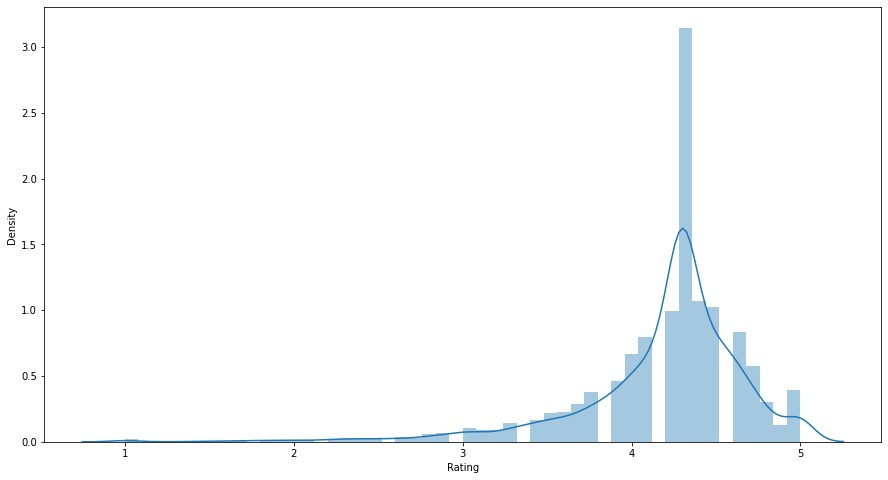

In [99]:
# Chart - 1 visualization code
print(Play_Store_DataFrame.Rating.value_counts())
print(" ")
plt.figure(figsize=(15,8))
sns.distplot(Play_Store_DataFrame.Rating)


##### 1. Why did you pick the specific chart?

We have used **distplot**  to check the distribution of the ratings in the play store dataset and to check the skewness of the ratings.

##### 2. What is/are the insight(s) found from the chart?

By using the plot we observed that the distribution is skewed towards right side and most of the rating lies between 4 to 5.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The rating distribution of a Play Store dataset can have a significant impact on business as it directly affects the visibility and perceived quality of a mobile app. Here, Most of the apps having ratings between 4 to 5 and rating of 4-5 can attract more downloads and increase customer trust, leading to increased revenue and success.

#### Chart - 2- Pie chart on Paid and Free Apps(Univariate)

Free    7740
Paid     682
Name: Type, dtype: int64


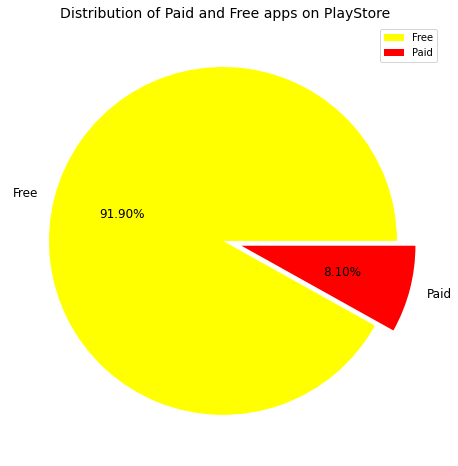

In [100]:
# Chart - 2 visualization code
print(Ratio_df)

labels = ['Free', 'Paid']

plt.figure(figsize=(8,8))
explode=(0.01,0.1)
colors = ['yellow','red']
plt.pie(Ratio_df, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 12})
plt.title('Distribution of Paid and Free apps on PlayStore',size=14,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of free and paid apps in play store dataset through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

Here we analyzed that, **91.90%** apps are free and **8.10%** apps are paid on google play store.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here, we observed that the number of Free Apps are more than the number of Paid Apps. With more free apps available, users have greater access to a wider range of applications and services, leading to a more positive experience on the Play Store.The prevalence of free apps may encourage more downloads, as users are less likely to be discouraged by the cost of purchasing an app.The higher number of free apps available means that users have more options to choose from, allowing them to find an app that best suits their needs.

But there can also be negative business impact if a large number of apps are available for free, the revenue generated by paid apps may decrease, as users are less likely to pay for apps when they have many free options available.

#### Chart - 3-Type Vs Total Users(Univariate)

   Type     Installs
0  Free  31358701885
1  Paid     42278509
 


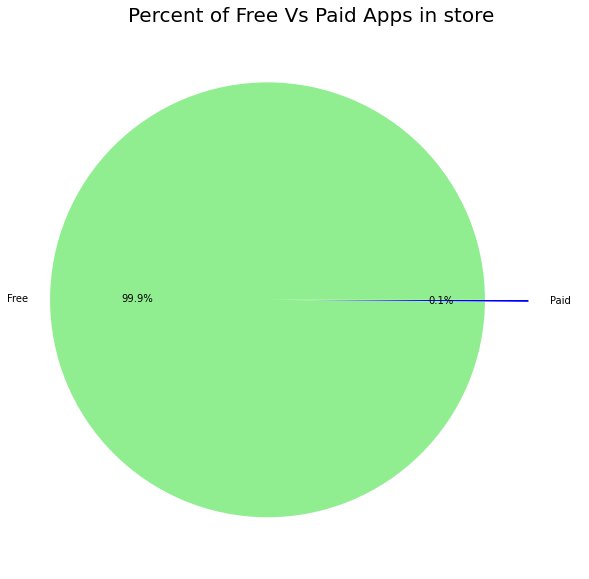

In [101]:
# Chart - 3 visualization code
print(Total_Users_Acc_to_Type)
print(" ")

plt.figure(figsize=(10,10))
colors = ["lightgreen","blue"]
explode = (0.2,0)
plt.pie(Total_Users_Acc_to_Type['Installs'], explode=explode, labels=Total_Users_Acc_to_Type["Type"], colors=colors, autopct='%1.1f%%', startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of user of free and paid apps in play store dataset through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

Here we analyzed that, **31358701885** users using free app and **42278509** using paid apps and the user of paid apps is almost negligible as compare to paid apps that is **99.9%** users using free apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In terms of **Reach** both free and paid apps have the potential to reach a large audience through the Play Store, leading to increased exposure and potential customers for a business. And in terms of **Revenue** Paid apps offer a direct source of revenue for businesses through app purchases. Free apps can also generate revenue through in-app purchases, advertisements, and other monetization methods.

Here, we observed that the large number of users using free apps than paid apps. So, it implies that to focus in-app purchases, advertisements, and other monetization methods to increase the revenue instead of paid apps.

#### Chart - 4- Pie chart on category(Univariate)




             index  Category
0           FAMILY      1723
1             GAME       873
2            TOOLS       729
3         BUSINESS       376
4          MEDICAL       368
5  PERSONALIZATION       349
6        LIFESTYLE       334
7          FINANCE       299
8     PRODUCTIVITY       291
9           SPORTS       285


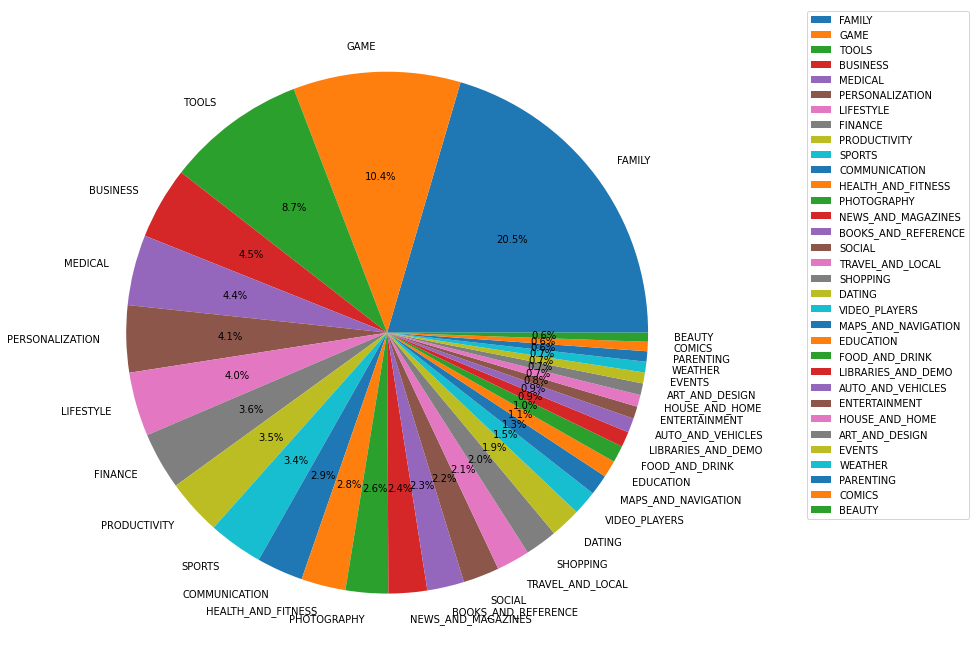

In [102]:
# Chart-4- Visualize Data
print(Top_Cat.head(10))

plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = Top_Cat['Category'], labels= Top_Cat['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of each category in play store dataset through pie chart with different colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

Here, we analyzed that **"Family"** category have the most number of apps in playstore.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A higher number of apps in a category means a larger target audience for businesses, providing a wider pool of potential customers.

But there can also be a negative impact on business growth, like with so many apps in a category, it can be difficult for businesses to get their apps noticed by potential users, leading to low visibility and usage.

#### Chart - 5- Pie chart on Content Ratings(Univariate)

Everyone           6907
Teen                898
Mature 17+          340
Everyone 10+        273
Adults only 18+       2
Unrated               2
Name: Content Rating, dtype: int64
 


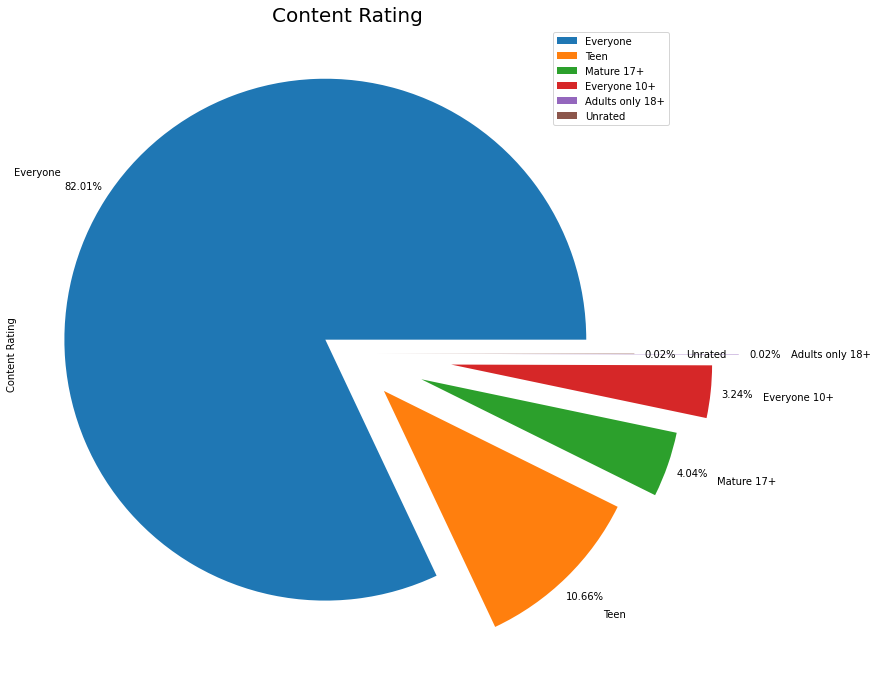

In [103]:
# Chart - 5 visualization code
print(content_rating)
print(" ")

plt.figure(figsize=(12,12))
content_rating.plot(kind='pie', explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%.2f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Content Rating',size=20,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of content rating in play store dataset through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

A majority of the apps **82.01%** in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having apps that cater to a wide range of users makes technology more accessible and user-friendly, allowing more people to benefit from its advantages leads to growth in business.

There can also be a negative impact, When apps are designed for a wide range of users, they may lack specialized features for certain groups of users, such as accessibility features for individuals with disabilities.

#### Chart - 6- Pie chart on Size Interval(Univariate)

0-25            6023
25-50           1523
50-75            536
75 and above     340
Name: size_interval, dtype: int64
 


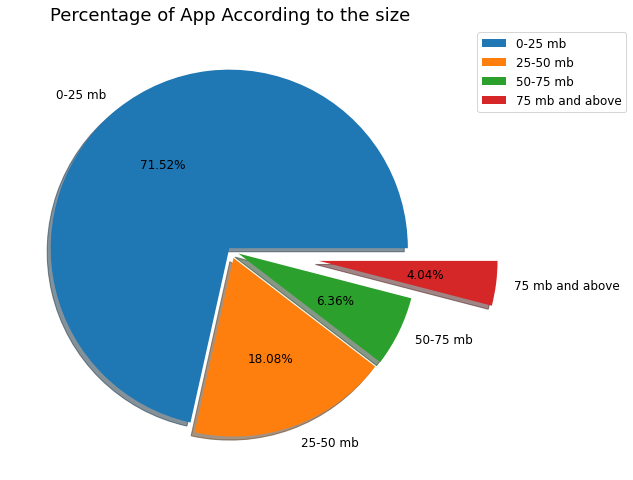

In [104]:
# Chart - 6 visualization code
print(Size_Distribution_df)
print(" ")

import matplotlib
counts = list(Play_Store_DataFrame['size_interval'].value_counts())
labels = '0-25 mb', '25-50 mb','50-75 mb','75 mb and above'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 11)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05,0.5], shadow=True, autopct="%.2f%%")
plt.title('Percentage of App According to the size', fontsize=18)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of app size in play store dataset through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

Here, we have seen that the size of the most apps on play store lies in the range of **"0-25"** mb's.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen that the size of the most apps on play store lies in the range of **"0-25"** mb's. So,  Smaller app sizes result in faster download times for users, which can improve the overall user experience and encourage them to download and use more apps. 

But Smaller apps may have lower quality graphics and other elements, which can negatively impact on the overall user experience and also on the business growth.

#### Chart - 7- Sentiment Analysis(Univariate)

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64
 


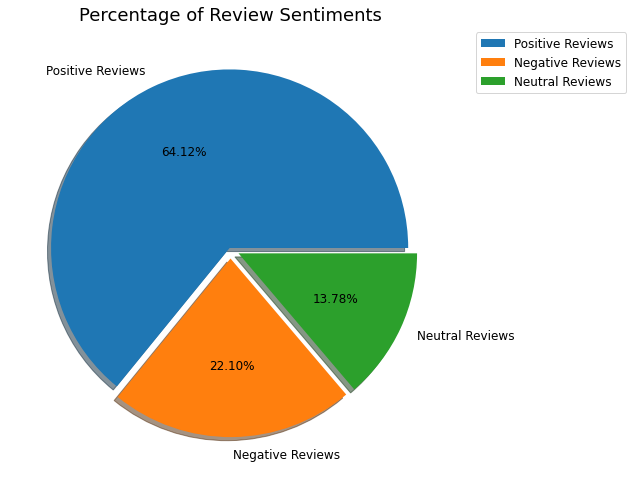

In [105]:
# Chart - 7 visualization code
print(User_Review_DataFrame['Sentiment'].value_counts())
print(" ")

import matplotlib
counts = list(User_Review_DataFrame['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 11)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=18)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are used to represent the proportional data or relative data in a single chart. The concept of pie slices is used to show the percentage of a particular data from the whole pie.

Thus, I used to show the percentage of Sentiments in play store dataset through pie chart with differentr colored area under a circle.

##### 2. What is/are the insight(s) found from the chart?

The below plot show that the Postitive reviews are in high, so that it can be conluded that the over all reviews are Positive.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen that the positive reviews are in high. So, High positive reviews can increase trust in the business and its offerings, making it more likely for users to make purchases or download other apps.

But Negative reviews can indicate that the apps in the dataset are not well-received by users, which can result in decreased popularity and exposure for the business.

#### Chart - 8- Distribution of Subjectivity(Univariate)

Text(0.5, 1.0, 'Distribution of Subjectivity')

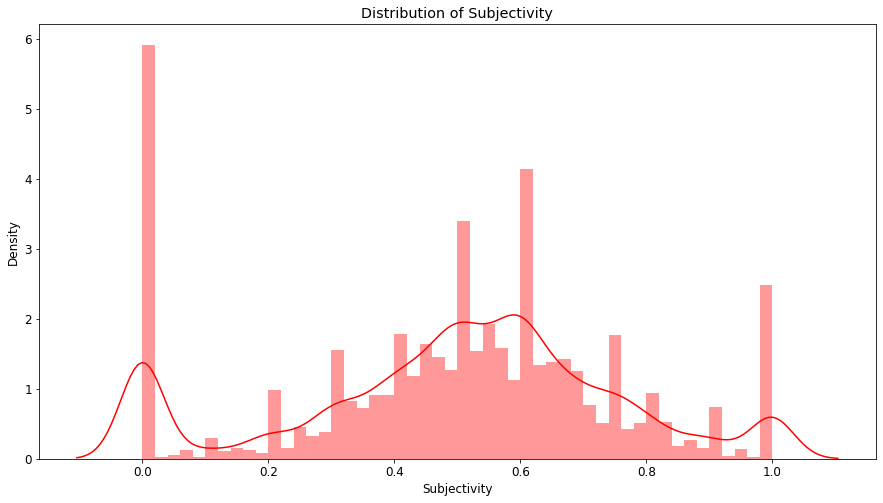

In [106]:
# Chart - 8 visualization code

#Plotting the distribution of Subjectivity
subjectivity_dataframe = Merged_PS_RA['Sentiment_Subjectivity']
plt.figure(figsize=(15,8))
sns.distplot(subjectivity_dataframe, hist=True,color="red")
plt.xlabel("Subjectivity")
plt.title('Distribution of Subjectivity')

##### 1. Why did you pick the specific chart?

We have used **distplot**  to check the distribution of the subjectivity in the user reviews dataset and to check the skewness of the ratings.

##### 2. What is/are the insight(s) found from the chart?

The maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The impact on business if the maximum number of sentiment subjectivity lies between 0.4 to 0.7 could have both positive and negative effects.

 On one hand, a higher number of users providing reviews indicates that the application has a significant user base and a strong engagement with its users. This could result in increased visibility and credibility for the business.

 On the other hand, if the sentiment of the reviews is mixed, with some positive and some negative, it could indicate that the application has room for improvement and may not meet the expectations of all users. This could lead to negative reviews, affecting the overall reputation of the business.

#### Chart - 9- Total_Earnings Vs Categories(Bivariate with Categorical-Numerical)




       Category  Total_Earnings
15    LIFESTYLE     57554049.40
9        FAMILY     41872015.86
12         GAME     40090634.87
10      FINANCE     25726678.98
21  PHOTOGRAPHY      8053267.70
 


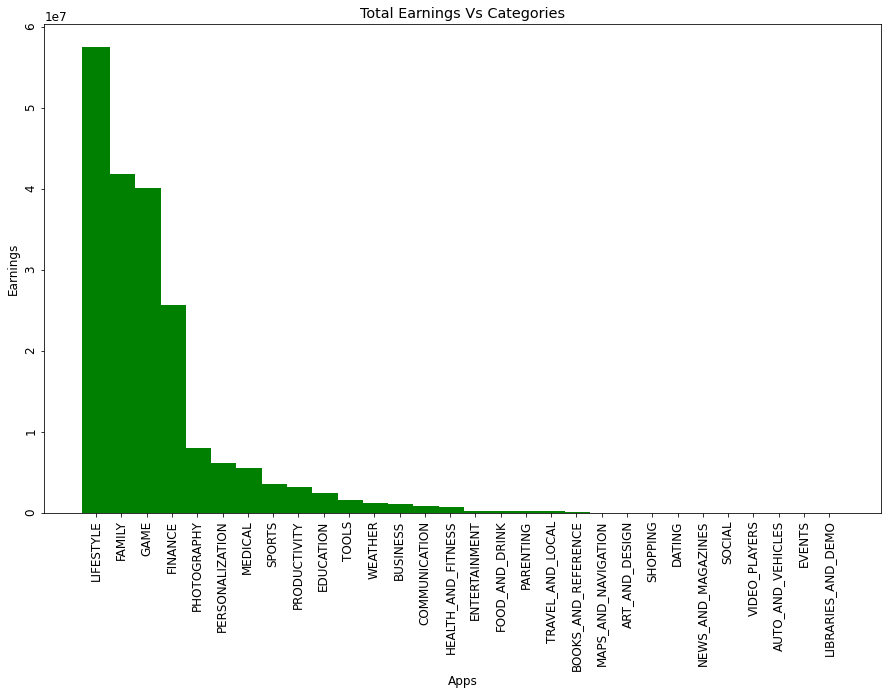

In [107]:
# Chart - 9 visualization code
print(Top_5.head())
print(" ")

plt.figure(figsize=(15,9))
plt.bar(Top_5.Category, Top_5.Total_Earnings, width=1.1, color = 'green', label=Top_5.Total_Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Total Earnings Vs Categories");

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total earnings with respect to categories, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, we analyzed that the top five earnings categories are **lifestyle**, **family**, **game**, **finance** and **photography**.

**Libraries_And_Demo** has the lowest earning among all categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the highest earning categories in the Play Store data set, businesses can make informed decisions on which areas of the app market are profitable and potentially profitable. Here, the categroies **lifestyle**, **family**, **game**, **finance** and **photography** has the highest earning. So, Businesses may focus on developing apps in these areas. 

Also, Need to focus on the lowest earning categories to avoid the negative impact on business.

#### Chart - 10- Apps Vs Earnings(Bivariate with Categorical-Numerical)


                           App   Category  Rating  Reviews    Size  Installs  \
4367  I'm Rich - Trump Edition  LIFESTYLE     3.6      275  7.3000     10000   
5351                 I am rich  LIFESTYLE     3.8     3547  1.8000    100000   
5356         I Am Rich Premium    FINANCE     4.1     1867  4.7000     50000   
5369                 I am Rich    FINANCE     4.3      180  3.8000      5000   
5359        I am rich(premium)    FINANCE     3.5      472  0.9424      5000   

      Type   Price Content Rating     Genres Last Updated Current Ver  \
4367  Paid  400.00       Everyone  Lifestyle   2018-05-03       1.0.1   
5351  Paid  399.99       Everyone  Lifestyle   2018-01-12         2.0   
5356  Paid  399.99       Everyone    Finance   2017-11-12         1.6   
5369  Paid  399.99       Everyone    Finance   2018-03-22         1.0   
5359  Paid  399.99       Everyone    Finance   2017-05-01         3.4   

       Android Ver  Total_Earnings  
4367    4.1 and up       4000000.0  
5351  

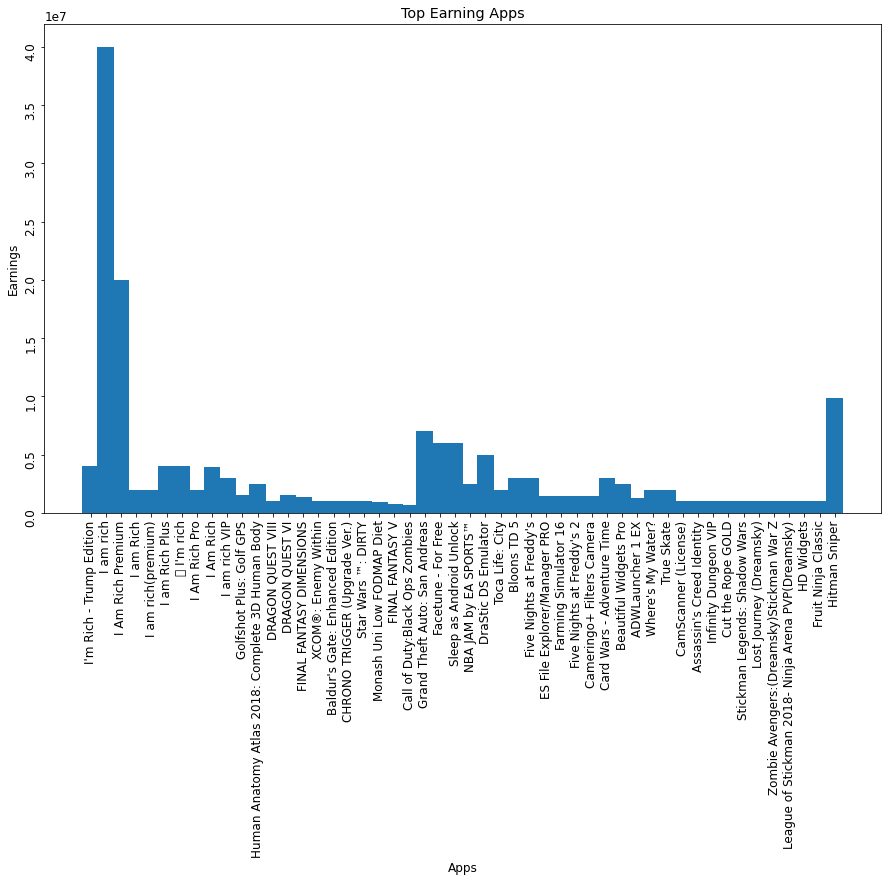

In [108]:
# Chart - 10 visualization code
print(DataFrame_sorted_by_Price.head(5))
print(" ")

plt.figure(figsize=(15,9))
plt.bar(DataFrame_sorted_by_Price.App, DataFrame_sorted_by_Price.Total_Earnings, width=1.1, label=DataFrame_sorted_by_Price.Total_Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the top earning Apps, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here we analyzed that the top five earnings apps are **I am rich**, **I Am Rich Premium**, **Hitman Sniper**, **Grant Theft Auto: San Andreas** and **Sleep as Android Unlock**. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In terms of business impact, these high earning apps: **I am rich**, **I Am Rich Premium**, **Hitman Sniper**, **Grant Theft Auto: San Andreas** and **Sleep as Android Unlock** can drive innovation and competition within the app market, leading to better user experiences and more sophisticated apps. They can also provide significant revenue streams for app developers, contributing to the growth of the mobile app industry.

#### Chart -11- Genres Vs Maximum App Ratings(Bivariate with Categorical-Numerical)



                                                 App             Category  \
0            Spring flowers theme couleurs d t space       ART_AND_DESIGN   
1  Tickets SDA 2018 and Exam from the State Traff...    AUTO_AND_VEHICLES   
2                     ipsy: Makeup, Beauty, and Tips               BEAUTY   
3                      R Programing Offline Tutorial  BOOKS_AND_REFERENCE   
4                              Ag Valley Cooperative             BUSINESS   

   Rating  Reviews  Size  Installs  Type  Price Content Rating  \
0     5.0        1   2.9       100  Free    0.0       Everyone   
1     4.9    10479  33.0    100000  Free    0.0       Everyone   
2     4.9    49790  14.0   1000000  Free    0.0       Everyone   
3     5.0        4   3.9      1000  Free    0.0       Everyone   
4     5.0        6  74.0       500  Free    0.0       Everyone   

              Genres Last Updated Current Ver Android Ver  
0       Art & Design   2018-04-18       1.0.2  4.0 and up  
1    Auto & Vehicles

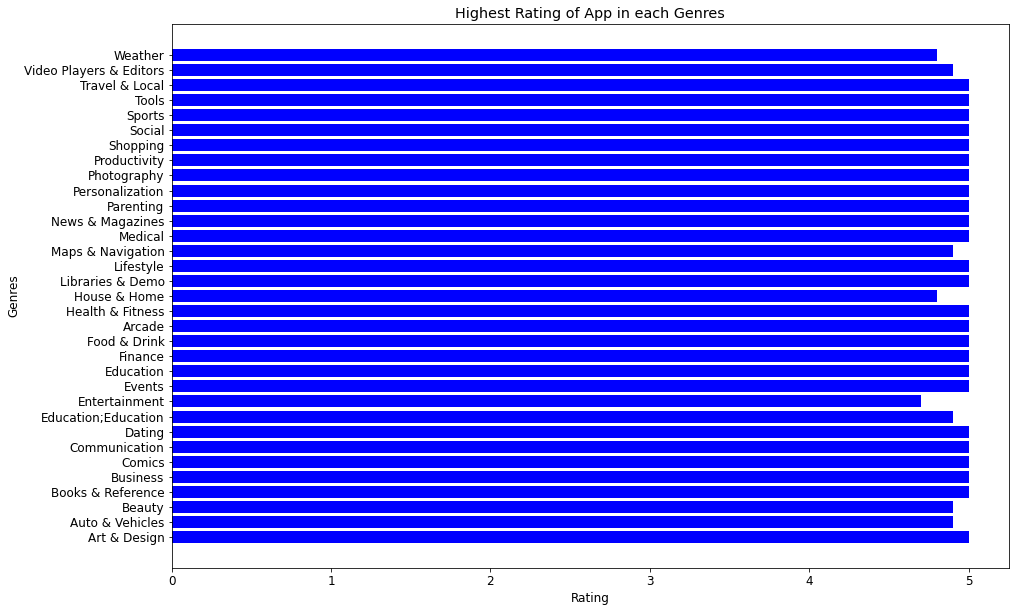

In [109]:
# Chart - 11 visualization code
print(Highest_Rated_app_IG.head(5))
print(Highest_Rated_app_IG[Highest_Rated_app_IG['Type']=='Paid'].head(5))

plt.figure(figsize=(15,10))
plt.barh(Highest_Rated_app_IG["Genres"], Highest_Rated_app_IG["Rating"], color="blue")
plt.xlabel("Rating")
plt.ylabel("Genres")
plt.title("Highest Rating of App in each Genres")
plt.yticks(Highest_Rated_app_IG["Genres"])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the genres with respect to rating, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, we analyzed that most of the genres having **"5"** rated app but only few genres like **Weather**, **Video Players & Editor**, **Maps and Navigations**,  **House & Home**, **Entertainment**, **Education**, **Beauty** and **Auto & vechicles** not having any **"5"** star rated app.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Genres with high rated Apps are more likely to be downloaded by users, leading to increased revenue and growth for the business.

But there can also be a high expectations for Genres,Genres with high rated apps are often held to high standards by users, making it more difficult for the business to maintain the rating and avoid disappointment.

#### Chart - 12- Month Vs Installs(Bivariate with Categorical-Numerical)




        Month     Installs
0       April   1052737619
1      August   7640130698
2    December    617596147
3    February    500989300
4     January    724607661
5        July  12850226027
6        June   3411137724
7       March    670799715
8         May   2513615607
9    November    707161197
10    October    411229474
11  September    300749225
 


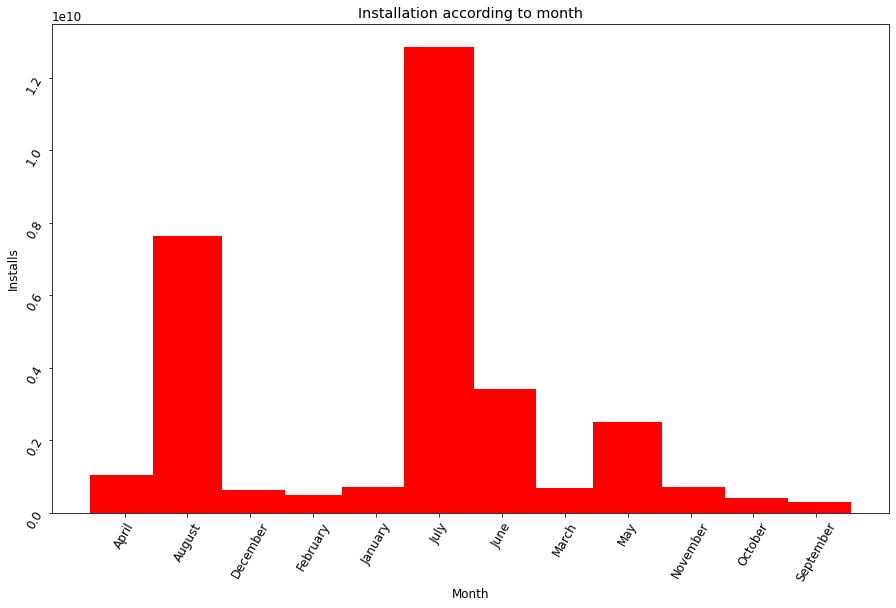

In [110]:
# Chart - 12 visualization code
print(Highest_Installation_df)
print(" ")

plt.figure(figsize=(15,9))
plt.bar(Highest_Installation_df.Month, Highest_Installation_df.Installs,color = 'red' ,width=1.1, label=Highest_Installation_df.Month)
plt.xlabel("Month")
plt.ylabel("Installs")
plt.tick_params(rotation=60)
plt.title("Installation according to month");

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the installation with respect to months, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, we analyzed that most of the apps installed in the month of  **"JULY"**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A high number of installations in 'July' month can lead to increased revenue for the business, as more users are downloading and using the app.

But there can also be a negative impact on business as because the number of installations may fluctuate seasonally, making it challenging for businesses to predict and plan for fluctuations in revenue and growth.

#### Chart - 13 Category Vs Average Ratings(Bivariate with Categorical-Numerical)


Category
EVENTS                 4.419298
ART_AND_DESIGN         4.377049
EDUCATION              4.373034
PARENTING              4.338889
PERSONALIZATION        4.319198
BOOKS_AND_REFERENCE    4.316580
BEAUTY                 4.293617
SOCIAL                 4.265079
WEATHER                4.248214
GAME                   4.238717
LIBRARIES_AND_DEMO     4.228750
SHOPPING               4.224405
SPORTS                 4.223158
HEALTH_AND_FITNESS     4.210345
MEDICAL                4.200543
FAMILY                 4.194428
NEWS_AND_MAGAZINES     4.180100
BUSINESS               4.179787
COMICS                 4.173469
AUTO_AND_VEHICLES      4.172000
PRODUCTIVITY           4.171821
HOUSE_AND_HOME         4.161290
ENTERTAINMENT          4.154687
FOOD_AND_DRINK         4.144318
FINANCE                4.131438
LIFESTYLE              4.130838
PHOTOGRAPHY            4.129279
COMMUNICATION          4.126446
TRAVEL_AND_LOCAL       4.064740
VIDEO_PLAYERS          4.054331
TOOLS                  4.047599

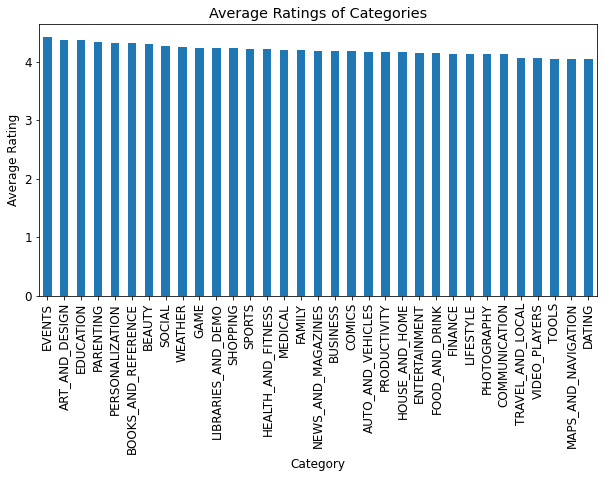

In [111]:
# Chart - 13 visualization code
category_rating = Play_Store_DataFrame.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_rating)
print(" ")

# Plot the average rating for each category
category_rating.plot(kind='bar', figsize=(10,5))
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Categories')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average ratings with respect to category, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here ,we have seen that the best average ratings categories are **EVENTS**, **ART_AND_DESIGN**, **EDUCATION**, **PARENTING** and **PERSONALIZATION**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that average ratings of apps in each category lies between 4 to 5.So, With users relying on ratings and reviews to make their decisions, app developers have an incentive to improve their products and deliver high-quality, user-friendly apps also leads to a positive business growth.



#### Chart-14- Total Reviews Vs Months(Bivariate with Categorical-Numerical)


        Month    Reviews
0       April   18829842
1      August  202035048
2    December   16102209
3    February   15791890
4     January   11974804
5        July  492554078
6        June  144588094
7       March   17515195
8         May   64411017
9    November   15057854
10    October   13109716
11  September    5371065
 


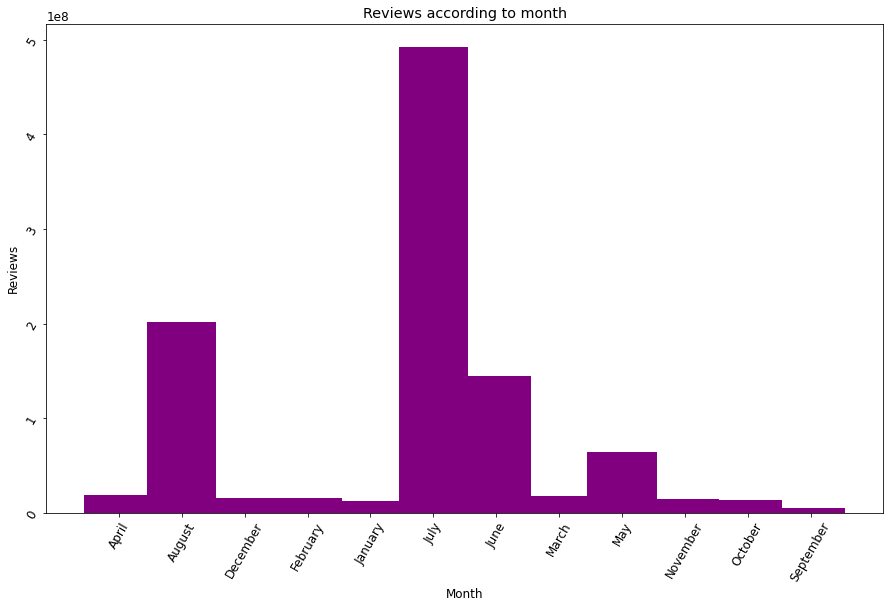

In [112]:
# Chart - 14 visualization code
print(Highest_Review_Month_df)
print(" ")

plt.figure(figsize=(15,9))
plt.bar(Highest_Review_Month_df.Month, Highest_Review_Month_df.Reviews,color = 'purple' ,width=1.1, label=Highest_Review_Month_df.Month)
plt.xlabel("Month")
plt.ylabel("Reviews")
plt.tick_params(rotation=60)
plt.title("Reviews according to month");

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total reviews with respect to the month, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, we analyzed that most of the reviews happened in the month of  **"JULY"**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The highest reviewed month 'JULY' could indicate a surge in activity and engagement from users, which can lead to increased exposure and visibility for the apps in the dataset. It is important for businesses to monitor and analyze the highest reviewed month and use the insights to make informed decisions to improve their offerings and meet their business goals.

But Also the higher volume of reviews during the highest reviewed month 'July' could also make it more challenging to manage and respond to all the reviews in a timely manner, potentially impacting the overall quality and user experience of the apps.

#### Chart - 15-Positive Sentiment Vs Apps(Bivariate with Categorical-Numerical)

App                             Sentiment
Helix Jump                      Positive     209
Duolingo: Learn Languages Free  Positive     200
Calorie Counter - Macros        Positive     174
Bowmasters                      Positive     169
Calorie Counter - MyFitnessPal  Positive     169
10 Best Foods for You           Positive     162
Google Photos                   Positive     143
8fit Workouts & Meal Planner    Positive     137
Garena Free Fire                Positive     136
DRAGON BALL LEGENDS             Positive     127
Name: Sentiment, dtype: int64
 


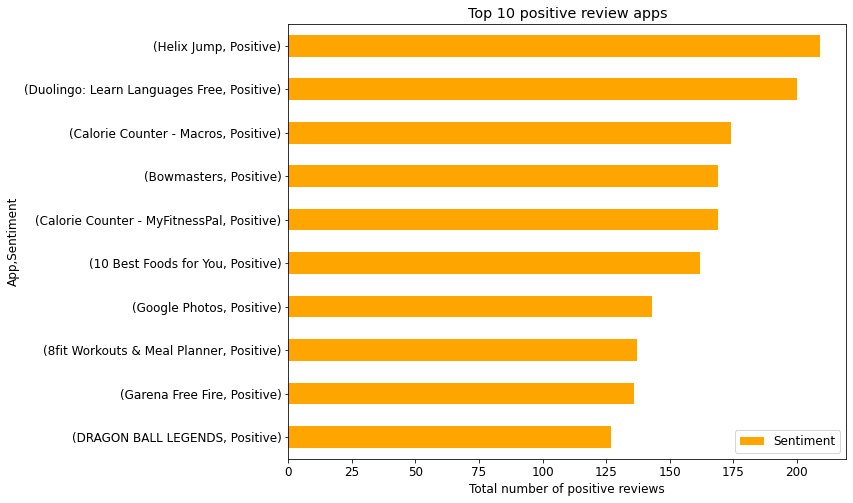

In [113]:
# Chart - 15 visualization code
print(positive_review_df.groupby('App')['Sentiment'].value_counts().nlargest(10))
print(" ")

positive_review_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='Orange').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total positive reviews with respect to the Apps, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, We have seen that, Here the most positively reviewed app is **Helix Jump.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen that the most positive reviewed app is ' Helix Jump'. So, positive reviews can play a crucial role in driving business growth for an app by improving its reputation, increasing customer confidence, and generating more word-of-mouth promotion.

#### Chart - 16-Negative Sentiment Vs Apps(Bivariate with Categorical-Numerical) 

App                    Sentiment
Angry Birds Classic    Negative     147
Candy Crush Saga       Negative     126
Bowmasters             Negative     119
8 Ball Pool            Negative     106
Candy Crush Soda Saga  Negative      96
Garena Free Fire       Negative      81
Cooking Fever          Negative      79
Alto's Adventure       Negative      72
Block Puzzle           Negative      71
Agar.io                Negative      66
Name: Sentiment, dtype: int64
 


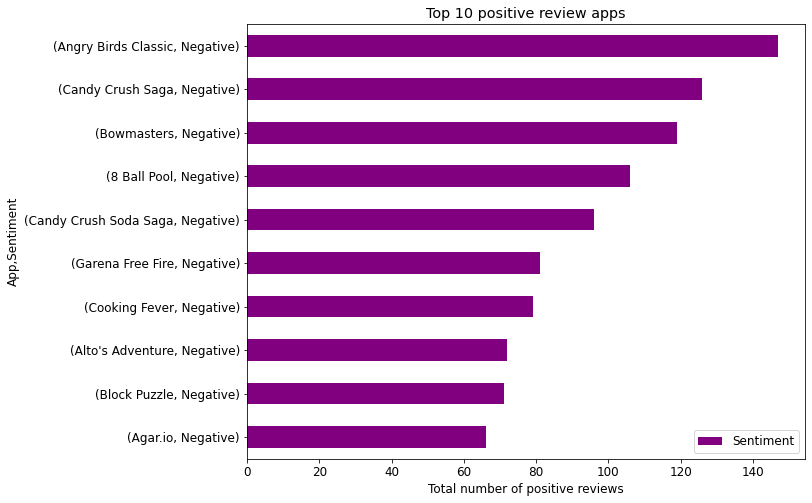

In [114]:
# Chart - 16 visualization code
print(negative_review_df.groupby('App')['Sentiment'].value_counts().nlargest(10))
print(" ")

negative_review_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='Purple').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the total negative reviews with respect to the Apps, We have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Here, we have seen that the most negative sentiment app is **'Angry birds Classic'**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we have seen that the most negative sentiment app is **'Angry birds Classic'**. So,there will be impact on an app's business by damaging its reputation, reducing customer confidence, and reducing its reach and popularity. This app can lead to a decline in the app's overall performance and potential loss of customers.

#### Chart - 17 Subjectivity Vs Polarity(Bivariate with Numerical_Numerical)

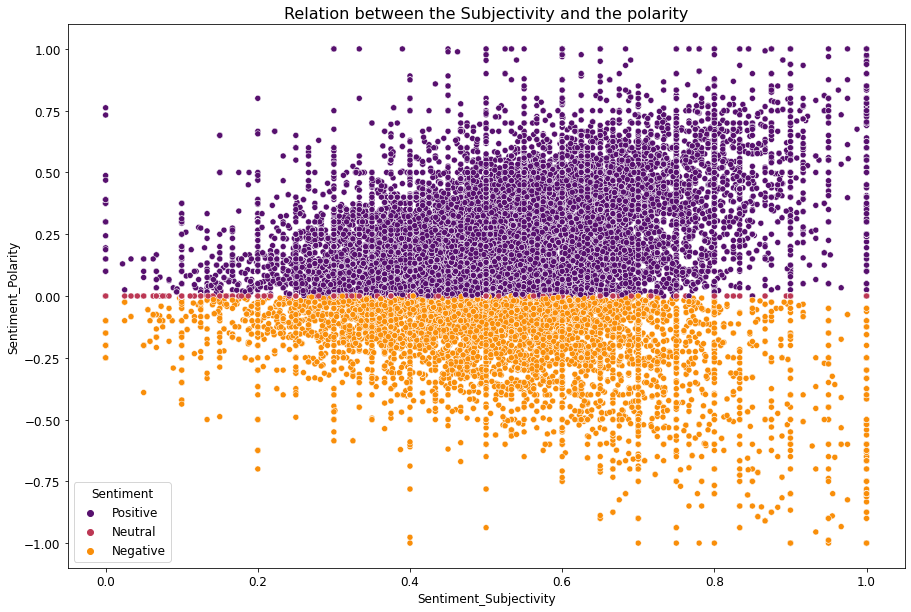

In [115]:
# Chart - 17 visualization code

# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(User_Review_DataFrame['Sentiment_Subjectivity'], User_Review_DataFrame['Sentiment_Polarity'],
                hue = User_Review_DataFrame['Sentiment'], edgecolor='white', palette="inferno")
plt.title("Relation between the Subjectivity and the polarity", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a graph that shows the relationship between data that has two numeric variables.
Thus, we have use scatter plot to check the relationship between the **Sentiment_Subjectivity** and **Sentiment_Polarity**

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A higher proportionality of sentiment subjectivity and polarity could indicate that the business is satisfying the needs and expectations of its customers, resulting in positive reviews and a positive reputation. This could lead to increased customer loyalty, higher brand recognition, and improved business growth.

But also if the variance is too high or low, it could indicate that the business is not consistently meeting the expectations of its customers. This could result in negative reviews and a negative reputation, affecting the overall growth and success of the business. It may also indicate a lack of customer satisfaction, which could lead to decreased customer loyalty and lower brand recognition.

#### Chart - 18 - Correlation Heatmap(Play Store Dataset)

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.061308  0.045528  0.040479 -0.018734
Reviews   0.061308  1.000000  0.179275  0.597281 -0.008656
Size      0.045528  0.179275  1.000000  0.134216 -0.022494
Installs  0.040479  0.597281  0.134216  1.000000 -0.010156
Price    -0.018734 -0.008656 -0.022494 -0.010156  1.000000
 


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

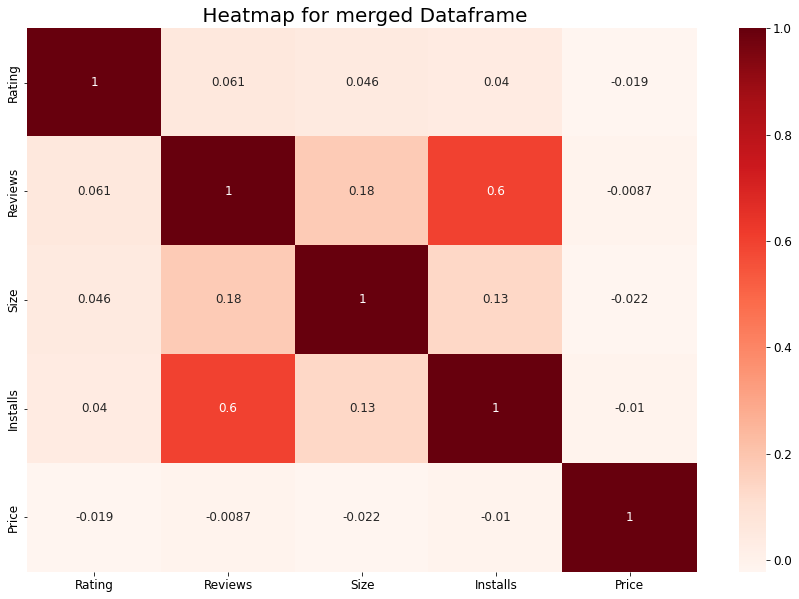

In [116]:
# Chart- 18 Data Visualization
print(Play_Store_DataFrame.corr())
print(" ")
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(Play_Store_DataFrame.corr(), annot= True, cmap='Reds')
plt.title(' Heatmap for merged Dataframe', size=20)

##### 1. Why did you pick the specific chart?**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the correlation heat map we can see that there is a positive relationship between the columns **"Intalls"** and **"Reviews"**, similarly there is a positive relationship between the columns **"Size"** and **"Reviews"**.

Rest all correlation can be depicted from the above chart.

#### Chart - 19 - Correlation Heatmap(User Reviews Dataset) 

                        Sentiment_Polarity  Sentiment_Subjectivity
Sentiment_Polarity                1.000000                0.261587
Sentiment_Subjectivity            0.261587                1.000000
 


Text(0.5, 1.0, ' Heatmap for User Reviews Dataframe')

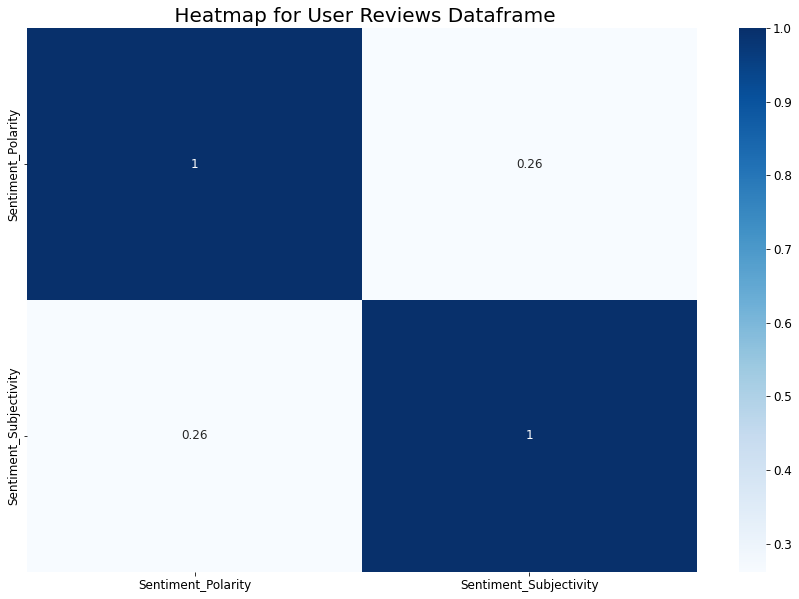

In [117]:
# Chart-19 Data Visualization
print(User_Review_DataFrame.corr())
print(" ")
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(User_Review_DataFrame.corr(), annot= True, cmap='Blues')
plt.title(' Heatmap for User Reviews Dataframe', size=20)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here from the correlation heat map we can clearly see that there is a positive relationship between **"Sentiment_Polarity"** and **"Sentiment_Subjectivity"** but this relationship is not so strong.

#### Chart- 20- Sns Pair plot(Play Store Dataset)

Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

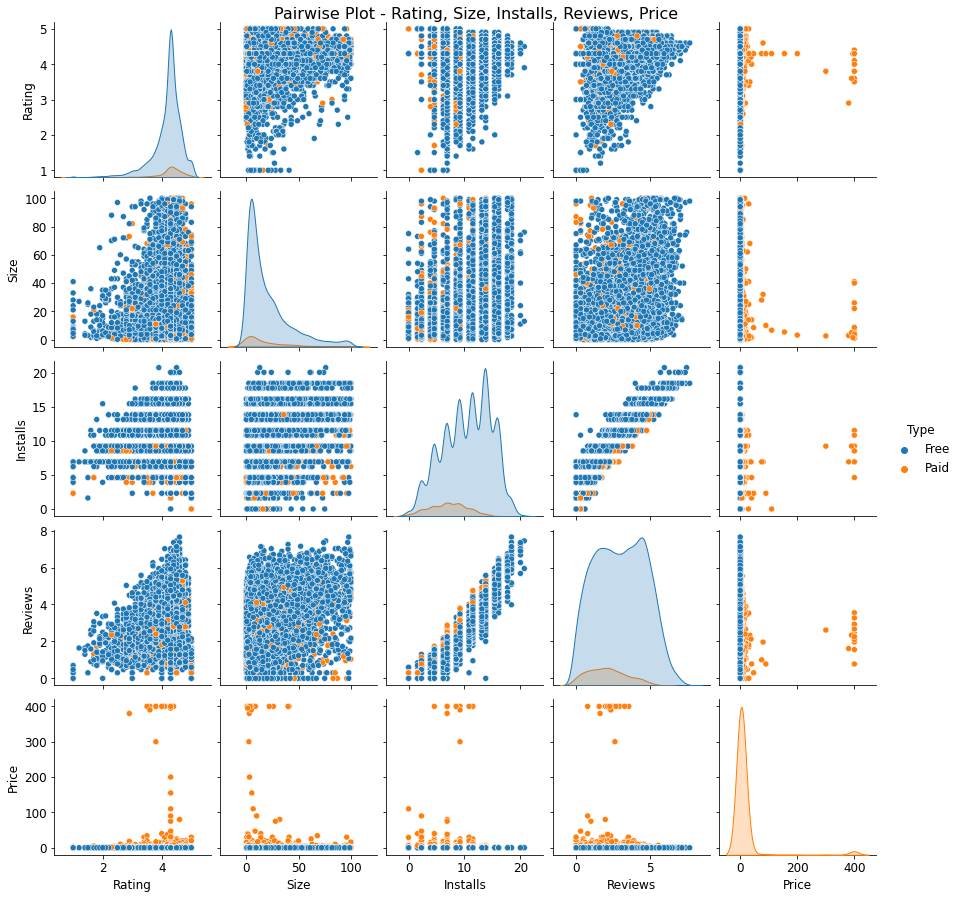

In [118]:
# Chart-20 Visualizing the Play Store Dataset.
Rating = Play_Store_DataFrame['Rating']
Size = Play_Store_DataFrame['Size']
Installs = Play_Store_DataFrame['Installs']
Reviews = Play_Store_DataFrame['Reviews']
Type = Play_Store_DataFrame['Type']
Price = Play_Store_DataFrame['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a type of plot that allows for the simultaneous visualization of multiple variables in a dataset. In the context of a Play Store dataset, a pair plot could be used to explore the relationship between different variables, such as ratings, number of downloads, and category, in order to gain insights into the behavior of the data.

So, we have used pair plot to check the relationships between the columns.

##### 2. What is/are the insight(s) found from the chart?

Here, we have seen that 
* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
* Most of the Apps are light-weighted.

#### Chart -21- Sns Pair plot(User Reviews Dataset)

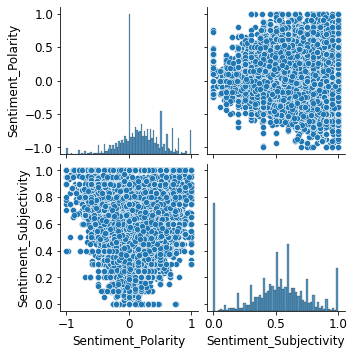

In [119]:
# Chart-21 Visualizing the Play Store Dataset.
sns.pairplot(User_Review_DataFrame)

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatterplot matrix, is a type of plot that allows for the simultaneous visualization of multiple variables in a dataset. In the context of a User Reviews dataset, a pair plot could be used to explore the relationship between different variables, such as sentiment_subjectivity and sentiment_polarity in order to gain insights into the behavior of the data.

So, we have used pair plot to check the relationships between the columns.

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that the sentiment_subjectivity is not proportional to the sentiment_polarity and the maximum number of sentiment subjectivity lies between 0.4 to 0.7 

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

The solution to business objectives in the Playstore dataset Exploratory Data Analysis (EDA) would depend on the specific goals of the business. However, here are a few common approaches for analyzing Playstore data:

**App Trends:** Analyze the most popular and highly rated apps by categories and time, to understand user preferences and identify opportunities for new app development. Developing apps related to the least categories as they are not explored much. Like **Libraries_And_Demo and Events** .

**User Demographics:** Study the demographics of app users to understand their age, gender, location, and device preferences. Focusing more on content available for **Everyone** will increase the chances of getting the highest installs.

**Revenue Generation:** Analyze app pricing, in-app purchases, and advertising revenue to understand the most profitable business models and optimize pricing strategies. Most of the apps are Free, so focusing on **Free** app is more important.

**User Engagement:** Study user behavior, including app usage frequency, session duration, and retention rate, to understand how to improve user engagement and increase app adoption.So, need to focus on updating their apps regularly, so that it will attract more users.

**Competitor Analysis:** Compare the performance of your app against similar apps in the market to identify strengths and weaknesses and inform marketing and product development strategies.

# **Conclusion**

**Findings**
* Percentage of free apps = ~92%
* Percentage of Users using Free apps = 99.9%
* Most competitive category: Family
* Category with the highest earnings: Lifestyle
* Highest earning app:  I am rich
* Most of the genres having "5" rated app
* Most of the apps installed in the month: "JULY"
* Percentage of apps with no age restrictions = ~82%
* Average ratings of apps in each category lies between 4 to 5
* The size of the most apps on play store lies in the range of: "0-25" mb's.
* Most of the reviews happened in the month: "JULY"
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

**Limitations:** The dataset may only include reviews from a limited time period, which may not accurately reflect the current market trends or user preferences.

**Recommendations:** Needs to focus on updating their apps regularly, so that it will attract more users. Most of the apps are Free, so focusing on free app is more important. Focusing more on content available for Everyone will increase the chances of getting the highest installs.

**Future Work:** Machine learning can help us to deploy more insights by developing models which can help us interpret even more better. We have left this as future work as this is something where we can work on.